# Problem Statement
Customer churn is a crucial concern for businesses across sectors. Understanding customer behaviors,identifying key factors contributing to churn, and predicting when customers are likely to churn are vitalfor reducing revenue loss and enhancing customer retention strategies.

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score,roc_auc_score, accuracy_score, classification_report

# loading dataset

In [3]:
cc=pd.read_csv(r"C:\Users\akash\Downloads\Customer_Churn.csv")
cc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning 

In [4]:
cc.shape

(7043, 21)

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#The column TotalCharges has numerical values but the datatype is not numerical. Thus it is important to convert it into numerical datatype.

In [7]:
cc["TotalCharges"] = pd.to_numeric(cc["TotalCharges"],errors="coerce")

In [8]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
cc.isnull().sum()                                          #checking null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#The 11 null values need to be removed from the dataset

In [11]:
cc.dropna(inplace=True)                  #In TotalCharges columns some null values are present so we delete that null values.

In [12]:
cc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
cc.shape

(7032, 21)

In [14]:
cc.drop("customerID",axis="columns",inplace=True)  #customerID is unique column & we don't want that column thats why we drop that column.

In [15]:
cc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
cc.shape

(7032, 20)

# Exploratory Data Analysis

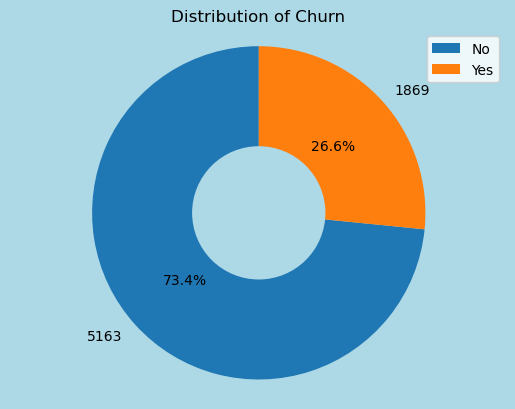

In [17]:
fig, ax = plt.subplots(facecolor="lightblue")
d = cc["Churn"].value_counts()
ax.pie(d,autopct='%1.1f%%', startangle=90,labels=d.values)
ax.legend(d.index)
ax.set_title("Distribution of Churn")
centre_circle = plt.Circle((0,0),0.4,fc='lightblue')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal');

In [18]:
#The data has higher percentage of customers that did not Churn. Thus the data is skewed.
#Over 26% customer churned or discontinue from the company services

In [19]:
cc.describe()                                                       #for numberical columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Churn relation with customer account information

[Text(0.5, 0, 'Count')]

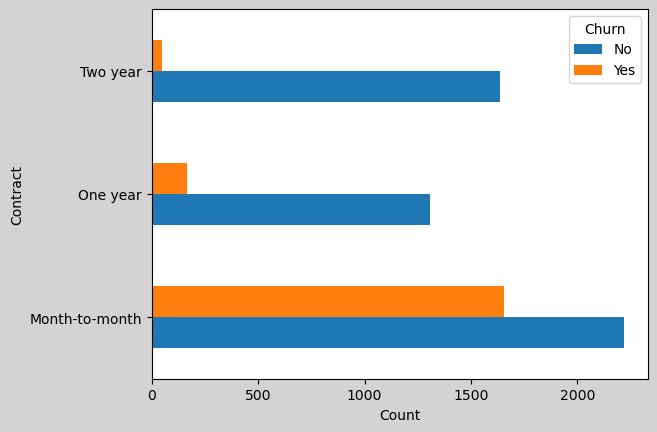

In [20]:
fig , ax = plt.subplots(facecolor="lightgray")
pd.crosstab(cc["Contract"],cc["Churn"]).plot(kind="barh",ax=ax)
ax.set(xlabel="Count")

In [21]:
#It can be observed that majority of customers that Churn have month-to-month contract type, while customers with two year contract type are more loyal.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

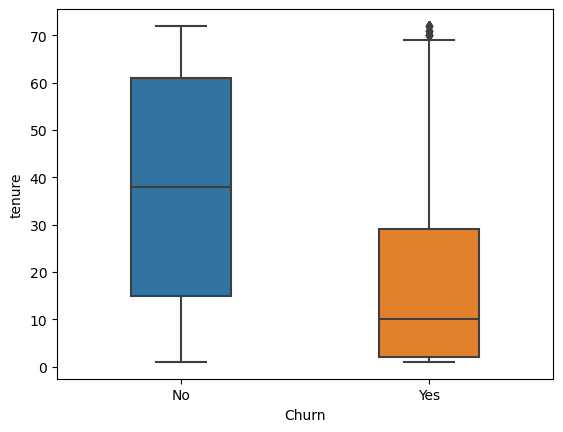

In [22]:
sns.boxplot(data=cc,x="Churn",y="tenure",width=0.4)

In [23]:
#New Customers are more likely to churn

[Text(0.5, 0, 'Count')]

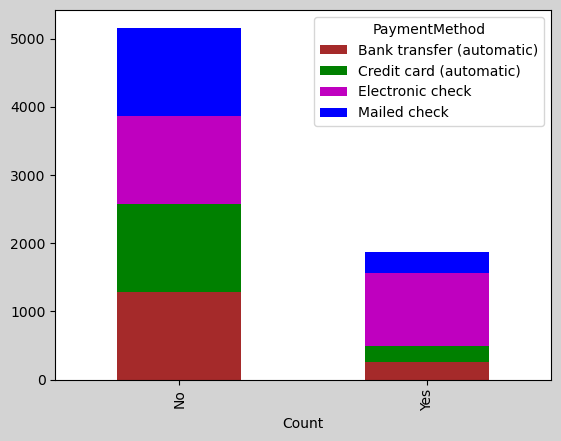

In [24]:
fig,ax = plt.subplots(facecolor="lightgray")
pd.crosstab(cc["Churn"],cc["PaymentMethod"]).plot(kind="bar",color=["brown","green","m","b"],ax=ax,stacked=True,)
ax.set(xlabel="Count")

In [25]:
#Customers with Payment Method as Electronic Check are much more likely to Churn compared to other payement methods.

Churn
No     AxesSubplot(0.125,0.11;0.775x0.77)
Yes    AxesSubplot(0.125,0.11;0.775x0.77)
Name: MonthlyCharges, dtype: object

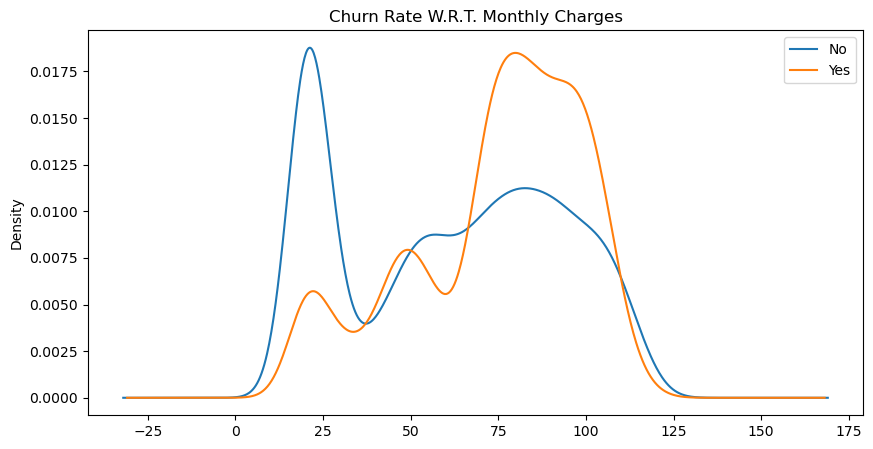

In [26]:
cc.groupby(['Churn'])['MonthlyCharges'].plot(kind='density', title='Churn Rate W.R.T. Monthly Charges' , figsize=(10, 5), legend= True)

In [27]:
#Customers with higher monthly charges are more likely to Churn.

Churn
No     AxesSubplot(0.125,0.11;0.775x0.77)
Yes    AxesSubplot(0.125,0.11;0.775x0.77)
Name: TotalCharges, dtype: object

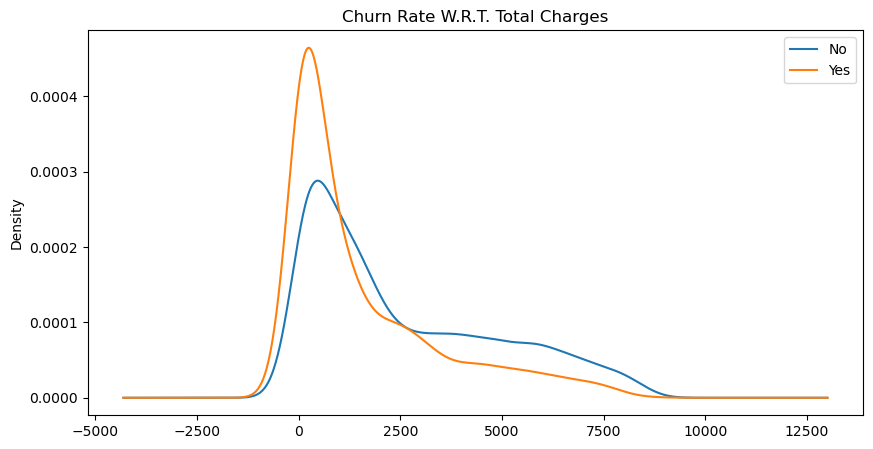

In [28]:
cc.groupby(['Churn'])['TotalCharges'].plot(kind='density', title='Churn Rate W.R.T. Total Charges' , figsize=(10, 5), legend= True)

In [29]:
#Customers show similar trends when it comes to the Total Charges.

Churn
No     AxesSubplot(0.125,0.11;0.775x0.77)
Yes    AxesSubplot(0.125,0.11;0.775x0.77)
Name: tenure, dtype: object

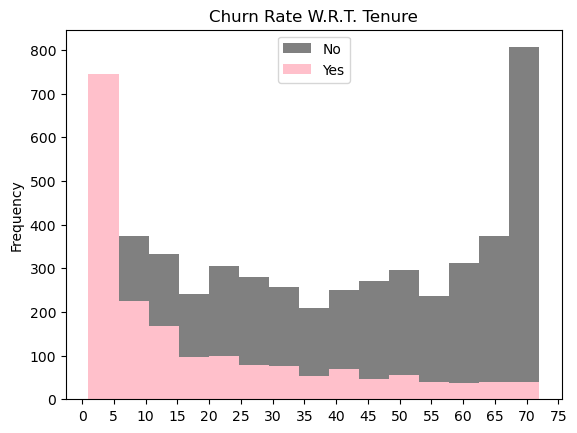

In [30]:
cc.groupby(['Churn'])['tenure'].plot(kind='hist', title='Churn Rate W.R.T. Tenure' , legend= True, color= {'Yes':'Pink','No':'grey'}, xticks = np.arange(0,80, step=5), bins=15)

In [31]:
#customers are more likely to Churn within first few months than later. The Churn rate reduces after a tenure of 6 months

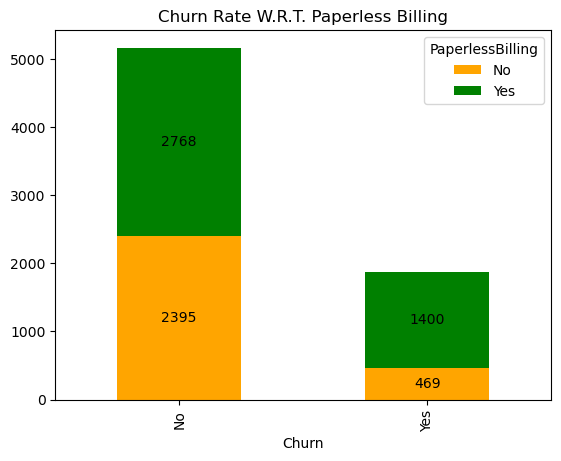

In [32]:
ax = cc.groupby(['Churn','PaperlessBilling']).size().unstack().plot(kind='bar', stacked = True, title='Churn Rate W.R.T. Paperless Billing' , color = {"Yes":"Green","No":"Orange"})
for container in ax.containers:
    labels = [int(v.get_height()) for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

In [33]:
#Customers that opt for Paperless Billing are more likely to Churn

# Churn relation with Demographic features
Looking at the demographic features like gender, age range, patner and dependent status of the customers we can find out the trends

array([<AxesSubplot:ylabel='Female'>, <AxesSubplot:ylabel='Male'>],
      dtype=object)

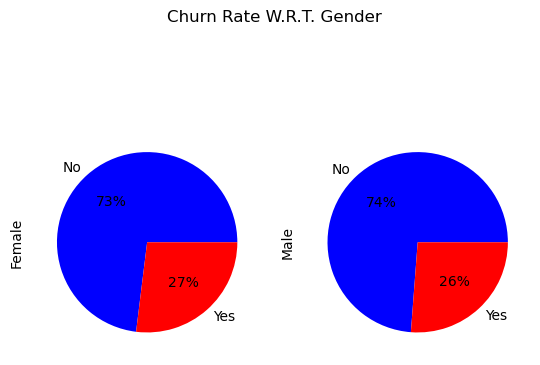

In [34]:
cc.groupby(['Churn','gender']).size().unstack().plot(kind='pie',subplots=True, title='Churn Rate W.R.T. Gender' , autopct='%1.0f%%', legend = False, colors =['blue','red'])

In [35]:
#Churn Rate for both male and female have same trends

In [36]:
cc['SeniorCitizen'].replace([1,0],['Yes','No'], inplace=True)

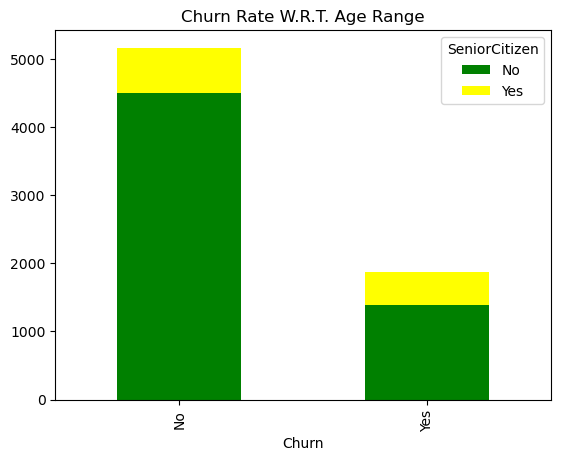

In [37]:
x = cc.groupby(['Churn','SeniorCitizen']).size().unstack().plot(kind='bar', stacked = True, title='Churn Rate W.R.T. Age Range' , color = {'Yes':'yellow','No':'green'})
for container in ax.containers:
    labels = [int(v.get_height()) for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

In [38]:
#The data has less fraction of senior citizens. But it can be observed that almost half of the senior citizens churn.

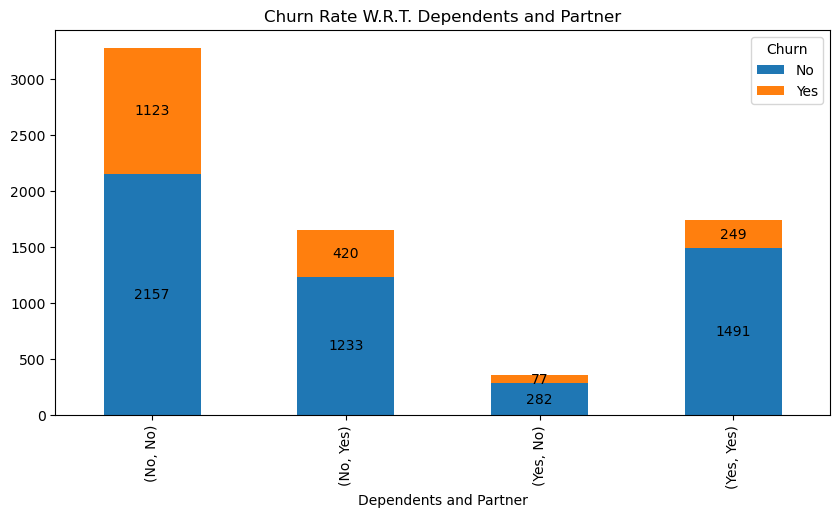

In [105]:
ax = cc.groupby(['Dependents', 'Partner', 'Churn']).size().unstack().plot(kind='bar', stacked = True, title='Churn Rate W.R.T. Dependents and Partner' , figsize=(10, 5), xlabel = 'Dependents and Partner')
for container in ax.containers:
    labels = [int(v.get_height()) for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

In [107]:
#Customers with No dependents and No partner are more likely to Churn

# Churn relation with Services taken by customers

array([<AxesSubplot:ylabel='DSL'>, <AxesSubplot:ylabel='Fiber optic'>,
       <AxesSubplot:ylabel='No'>], dtype=object)

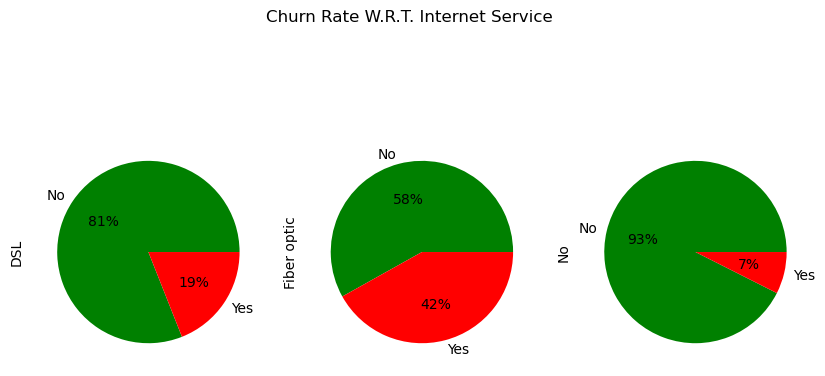

In [108]:
cc.groupby(['Churn','InternetService']).size().unstack().plot(kind='pie',subplots=True, title='Churn Rate W.R.T. Internet Service' , autopct='%1.0f%%', figsize=(10, 5), legend = False, colors =['green','red'])

In [109]:
#Customers with Fiber Optics are more likely to churn compared to DSL. Also customers with No internet service are less likely to churn.

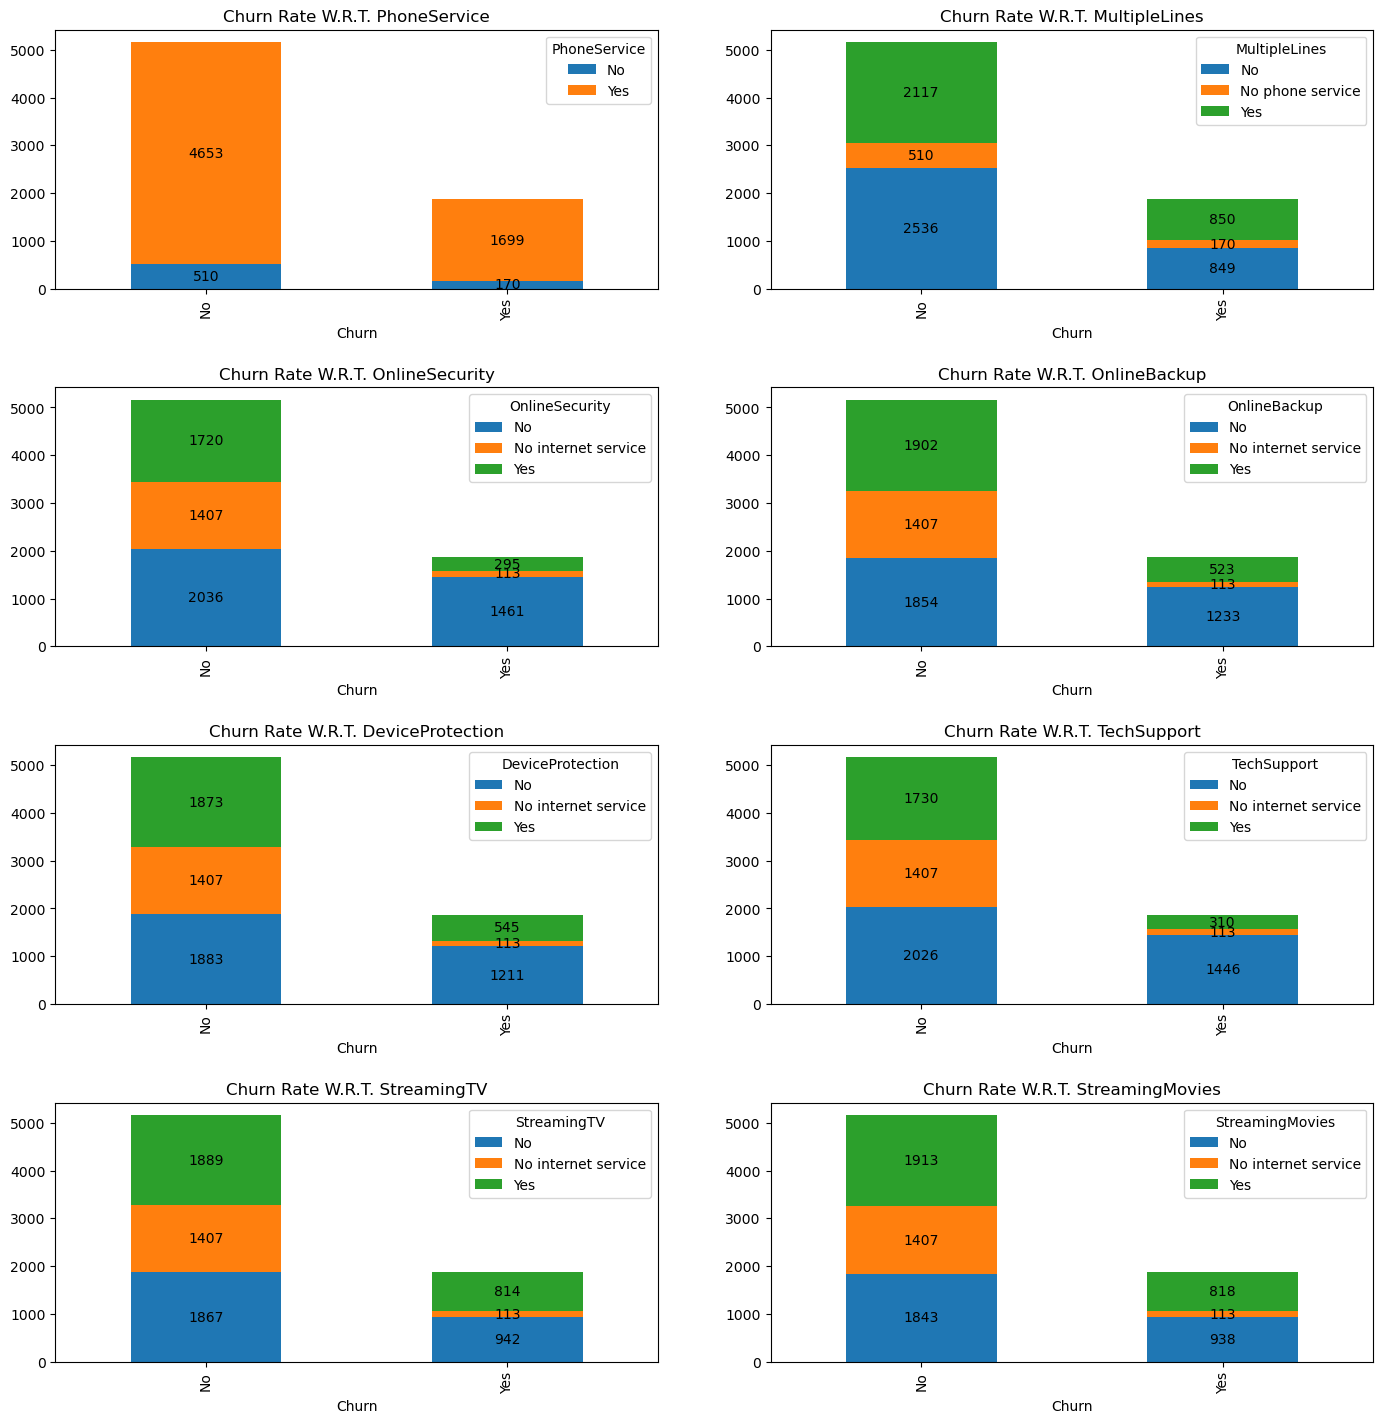

In [110]:
services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.tight_layout(pad=5.0)
k = 0

for i in range(4):
    for j in range(2):
        ax = cc.groupby(['Churn', services[k]]).size().unstack().plot(kind='bar', stacked=True, title='Churn Rate W.R.T. '+services[k], ax=axes[i, j])
        k = k + 1
        for container in ax.containers:
            labels = [int(v.get_height()) for v in container]
            ax.bar_label(container, labels=labels, label_type='center')






In [111]:
#Features like Phone Service or Multiple Lines service show similar trend in Churn and Non-Churn customers.
#Customers are more likely to Churn in the absence of Online Security, Online Backup, Device Protection or Tech Support.
#While presence or absence of Streaming TV or Streaming Movies service doesn't have much impact on Customer Churn.

# Model Building

In [112]:
#Label Encoder
#A Label encoder converts the categorical features into numerical data by encoding the labels .

In [113]:
le=LabelEncoder()

In [114]:
cc[cc.select_dtypes(include='object').columns]=cc[cc.select_dtypes(include='object').columns].apply(le.fit_transform)

In [115]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int32  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


In [116]:
#Sampling

In [117]:
y = cc['Churn']
X = cc.drop('Churn', axis=1)

In [118]:
#Since the data has different features with different range of values, it is important to scale them

In [119]:
scaler = MinMaxScaler()
column_name = X.columns
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = column_name)
X_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330


In [120]:
cc_train_x,cc_test_x,cc_train_y,cc_test_y,=train_test_split(X_scaled, y,test_size=0.2)

# 1.Logistic Regression

In [121]:
logi_cc=LogisticRegression()
logi_cc.fit(cc_train_x,cc_train_y)
pred=logi_cc.predict(cc_test_x)
cc_tab=confusion_matrix(cc_test_y,pred)             #confusion_matrix(actual,predicted)
cc_tab


array([[920, 104],
       [177, 206]], dtype=int64)

In [122]:
accuracy_score(cc_test_y,pred)*100                          #Accuracy

80.02842928216063

In [123]:
recall_score(cc_test_y,pred)*100                             #Recall(Tpr)=TP/TP+FN

53.78590078328982

In [124]:
precision_score(cc_test_y,pred)*100                         #Precision=TP/TP+FP

66.45161290322581

In [125]:
f1_score(cc_test_y,pred)*100                            #F1 ratio=2*Precision*Recall/Precision+Recall

59.45165945165945

In [126]:
print(classification_report(cc_test_y,pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1024
           1       0.66      0.54      0.59       383

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [127]:
pred_prob=logi_cc.predict_proba(cc_test_x) 
roc_auc_score(cc_test_y,pred_prob[:,1])

0.8469754609986946

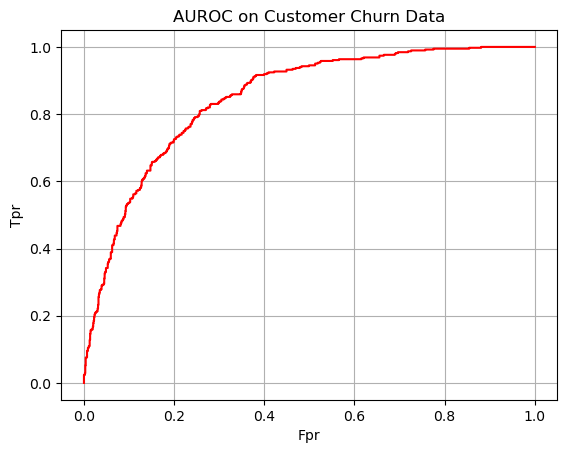

In [132]:
fpr,tpr,ther=roc_curve(cc_test_y,pred_prob[:,1])
plt.plot(fpr,tpr,color='r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('AUROC on Customer Churn Data')
plt.grid()


# 2.Decision Tree

In [133]:
dt_cc=DecisionTreeClassifier()
dt_cc.fit(cc_train_x,cc_train_y)
pred=dt_cc.predict(cc_test_x)
cc_tab=confusion_matrix(cc_test_y,pred)             #confusion_matrix(actual,predicted)
cc_tab


array([[823, 201],
       [197, 186]], dtype=int64)

In [134]:
accuracy_score(cc_test_y,pred)*100                          #Accuracy

71.71286425017769

In [135]:
recall_score(cc_test_y,pred)*100                             #Recall(Tpr)=TP/TP+FN

48.56396866840731

In [136]:
precision_score(cc_test_y,pred)*100                         #Precision=TP/TP+FP

48.06201550387597

In [137]:
f1_score(cc_test_y,pred)*100                            #F1 ratio=2*Precision*Recall/Precision+Recall

48.311688311688314

In [138]:
print(classification_report(cc_test_y,pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1024
           1       0.48      0.49      0.48       383

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



In [139]:
pred_prob=dt_cc.predict_proba(cc_test_x) 
roc_auc_score(cc_test_y,pred_prob[:,1])


0.6452209632016972

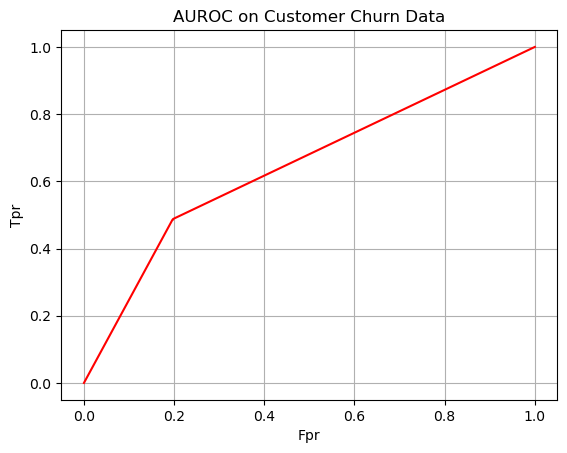

In [141]:
fpr,tpr,ther=roc_curve(cc_test_y,pred_prob[:,1])
plt.plot(fpr,tpr,color='r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('AUROC on Customer Churn Data')
plt.grid()


In [142]:
#ROC Curve showing the performance is not good

# 3.Random Forest

In [175]:
rf_cc=DecisionTreeClassifier( max_depth=10,min_samples_split=4,class_weight='balanced')
rf_cc.fit(cc_train_x,cc_train_y)
pred=rf_cc.predict(cc_test_x)
cc_tab=confusion_matrix(cc_test_y,pred)             #confusion_matrix(actual,predicted)
cc_tab


array([[750, 274],
       [ 99, 284]], dtype=int64)

In [176]:
accuracy_score(cc_test_y,pred)*100                          #Accuracy

73.48969438521678

In [174]:
recall_score(cc_test_y,pred)*100                             #Recall(Tpr)=TP/TP+FN


82.76762402088774

In [146]:
precision_score(cc_test_y,pred)*100                         #Precision=TP/TP+FP

45.714285714285715

In [147]:
f1_score(cc_test_y,pred)*100                              #F1 ratio=2*Precision*Recall/Precision+Recall

45.833333333333336

In [148]:
print(classification_report(cc_test_y,pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1024
           1       0.46      0.46      0.46       383

    accuracy                           0.70      1407
   macro avg       0.63      0.63      0.63      1407
weighted avg       0.70      0.70      0.70      1407



In [149]:
pred_prob=rf_cc.predict_proba(cc_test_x) 
roc_auc_score(cc_test_y,pred_prob[:,1])


0.6282241861129243

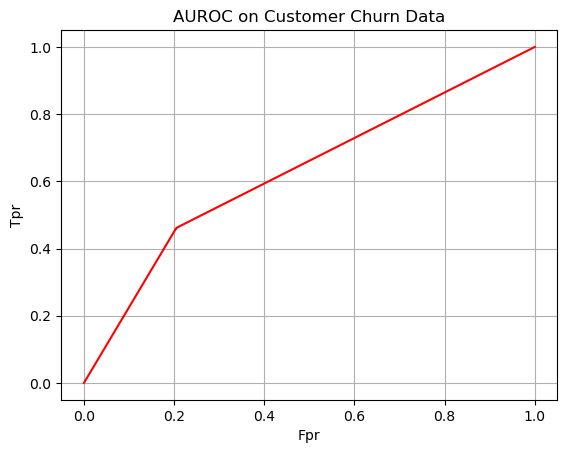

In [150]:
fpr,tpr,ther=roc_curve(cc_test_y,pred_prob[:,1])
plt.plot(fpr,tpr,color='r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('AUROC on Customer Churn Data')
plt.grid()


In [151]:
#ROC Curve showing the performance is not good

# 4.KNN

In [152]:
knn_cc=KNeighborsClassifier()
knn_cc.fit(cc_train_x,cc_train_y)
pred=knn_cc.predict(cc_test_x)
cc_tab=confusion_matrix(cc_test_y,pred)             #confusion_matrix(actual,predicted)
cc_tab


array([[869, 155],
       [202, 181]], dtype=int64)

In [153]:
accuracy_score(cc_test_y,pred)*100                          #Accuracy

74.6268656716418

In [154]:
recall_score(cc_test_y,pred)*100                             #Recall(Tpr)=TP/TP+FN


47.25848563968668

In [155]:
precision_score(cc_test_y,pred)*100                         #Precision=TP/TP+FP

53.86904761904761

In [156]:
f1_score(cc_test_y,pred)*100                              #F1 ratio=2*Precision*Recall/Precision+Recall

50.34770514603616

In [157]:
print(classification_report(cc_test_y,pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1024
           1       0.54      0.47      0.50       383

    accuracy                           0.75      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.74      0.75      0.74      1407



In [158]:
pred_prob=knn_cc.predict_proba(cc_test_x) 
roc_auc_score(cc_test_y,pred_prob[:,1])


0.7520079450881201

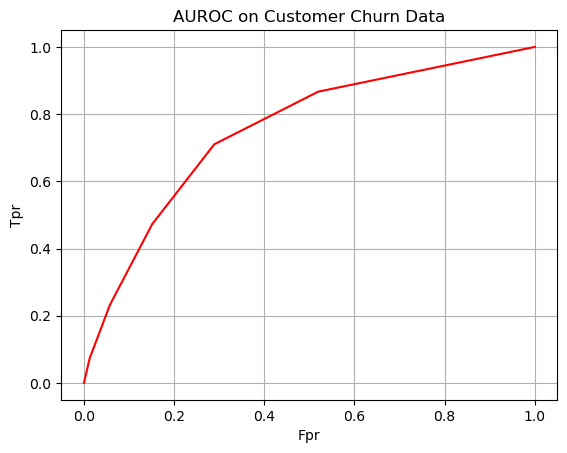

In [159]:
fpr,tpr,ther=roc_curve(cc_test_y,pred_prob[:,1])
plt.plot(fpr,tpr,color='r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('AUROC on Customer Churn Data')
plt.grid()


# 5.Naive Bayes

In [160]:
nb_cc=GaussianNB()
nb_cc.fit(cc_train_x,cc_train_y)
pred=nb_cc.predict(cc_test_x)
cc_tab=confusion_matrix(cc_test_y,pred)             #confusion_matrix(actual,predicted)
cc_tab


array([[776, 248],
       [106, 277]], dtype=int64)

In [161]:
accuracy_score(cc_test_y,pred)*100                          #Accuracy

74.84008528784648

In [162]:
recall_score(cc_test_y,pred)*100                             #Recall(Tpr)=TP/TP+FN


72.32375979112271

In [163]:
precision_score(cc_test_y,pred)*100                         #Precision=TP/TP+FP

52.761904761904766

In [164]:
f1_score(cc_test_y,pred)*100                              #F1 ratio=2*Precision*Recall/Precision+Recall

61.013215859030836

In [165]:
print(classification_report(cc_test_y,pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1024
           1       0.53      0.72      0.61       383

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.75      0.76      1407



In [166]:
pred_prob=nb_cc.predict_proba(cc_test_x) 
roc_auc_score(cc_test_y,pred_prob[:,1])


0.8275895479765013

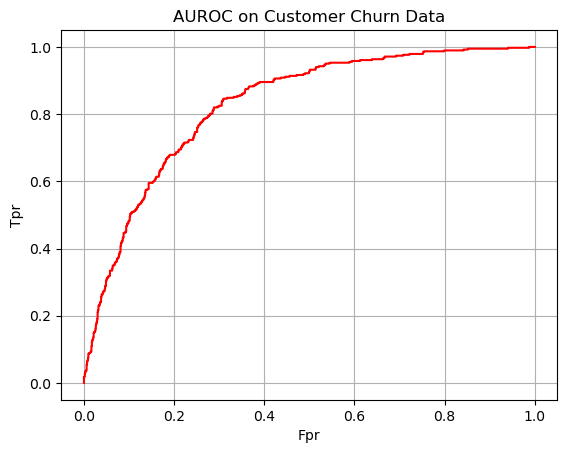

In [168]:
fpr,tpr,ther=roc_curve(cc_test_y,pred_prob[:,1])
plt.plot(fpr,tpr,color='r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('AUROC on Customer Churn Data')
plt.grid()


# Conclusion

After evaluating five models including logistic regression, decision tree, random forest, k-nearest neighbors (KNN), and naive Bayes on telecom customer churn data, we found that the logistic regression model achieved the highest accuracy. This outcome suggests that the linear relationship between predictor variables and the target churn variable is well-captured by logistic regression. The simplicity and interpretability of logistic regression make it a robust choice for predicting customer churn in this context. However, further analysis and experimentation may be necessary to explore potential improvements and ensure the model's reliability in real-world scenarios.

# Suggestions

Customer churning is considered to be bad for any organizational profitability & goodwill

There are several ways to eliminate this churning & here some tips have been shared below: 
1. Properly Know & Monitor your customers
2. Develop KYC
3. Properly identify the key risk factors that may cause your customer churning, including identifying factors and continuously improving them.
4. Engage in customer satisfaction process ( good service, quality, commitments, selling service over selling goods
5. Regular monitoring
6. Exit interview/survey who already churned
